<h1> Introduction to databases </h1>

Relational databases vs Non-relational databases

|relational databases|Non-relatinoal databases|
|--|--|
|organize data into one or more tables| organize data in anything but a tradition table|
|each table has columns and rows, a unique key identifies each row| key-value stores, documents (JSON, xml), graphs, flexible|
|SQL to manage the database system| no standard language to manage non-SQL databases)


<h3> Comparison</h3> 

<table>
  <tr>
    <td><img src="./img/sqlDB.png" width="800" /></td>
    <td><img src="./img/nonSQL.png" width="800" /></td>
  </tr>
</table>



<h3> Data format</h3> 
<img src="./img/nonSQLdata.png" width="800" />


<h3> Database queries</h3> 
Queries are requests to the database management system for get specific information

- as the database structure become more and more complex, it becomes deifficult to get the specific piece of information we want

- a google search is a query


<h3> SQL Table and KEYS </h3>  

column >> defines attribute

row >> individual entry

Primary key

- surrogate key  >> a type of primary key, is a key that has no mapping to anything in the real world

- natural key >> a type of primary key, is a key that has a mapping to the real world

Foreign key 

- An **attribute** that we can store on a database table that will link us to another database table

- The foreigh key store the PK of a row in another table
- Foreign key help us to define relation between tables

Composite key

- A key that nees two attributes, that is two columns to uniquely identifying each row

### Database design
Constraints in the databases can be categorized into 3 main categories: 

- Implicit constraints >>
Constraints that are applied in the data model

- schema-based constraints or Explicit constraints >> 
Constraints that are directly applied in the schemas of the data model, by specifying them in the DDL(Data Definition Language). 

- Application based or semantic constraints >>
Constraints that cannot be directly applied in the schemas of the data model. We call these 

## Implicit constraints
Mainly Constraints on the relational database are of 4 types: 

1. Domain constraints

- Every domain must contain **atomic values**(smallest indivisible units) it means composite and multi-valued attributes are not allowed.
- We perform datatype check here, which means when we assign a data type to a column we limit the values that it can contain. Eg. If we assign the datatype of attribute age as int, we cant give it values other then int datatype.


2. Key constraints

- **uniqueness constraints** since it ensures that every tuple in the relation should be unique.
- choose primary key: don’t have any restriction on choosing the primary key out of candidate keys, but it is suggested to go with the candidate key with less number of attributes.
- **Null values are not allowed in the primary key**, hence Not Null constraint is also a part of key constraint.


- Entity Integrity constraints
- Referential integrity constraints

<h1>SQL BASIC</h1>

Structured Query Language

SQL implementations very between systems
- the concepts are the same but implementation in different systems may **needs some twick**


SQL is a hybrid language, it's basically 4 types:

- Data query language (DQL)
    - used to query the database for information
    - get information that is already stored there

- Data defination language

    - used for defininf database schemas

- Data control language

    - used for controlling access to data in the database
    - user and permission management

- Data manipulation language

    - used for inserting, updating, and deleting data from the database

<h3>Data type</h3>

| Type | holds | example |
| --------------- | --------------- | --------------- | 
| INT  | Whole numbers  |  |
| DECIMAL(m,n)  | decimal, m = total digits, n = digits after decimal point  | |
| VARCHAR(10) | String of text, length of 10 |   |
| BLOB  |Binary large object, stores large data | stream, picture |
| DATE| YYYY-MM-DD |  |
| TIMESTAMP  | YYYY-MM-DD HH:MM:SS  |   |

<h3>Creating tables</h3>

```sql

-- create a database


-- create a table
CREATE TABLE student(
    student_id INT PRIMARY KEY, --PK's constaints is not null + unique
    name VARCHAR (20),
    major VARCHAR(20)
);

-- primary key in another way, and adding constraints   (not null, unique, defualt, auto_increment, ...)
CREATE TABLE student(
    student_id INT AUTO_INCREMENT,   
    name VARCHAR (20)  NOT NULL,
    major VARCHAR(20) DEFAULT 'undecided',
    PRIMARY KEY(student_id)   
);

DESCRIBE student;     -- see the columns info
SELECT * FROM student;  -- see the table

DROP TABLE student;  -- drop the table

ALTER TABLE student ADD gpa DECIMAL(3,2);    -- add a new column to the table
ALTER TABLE student DROP COLUMN gpa;   -- drop the column
```



<h3>Inserting data</h3>

```sql
--insert data
INSERT INTO student 
VALUES(1, 'jack', 'biology');

--insert multiple rows
INSERT INTO table_name (column1, column2, column3, ...)
VALUES
(value1_row1, value2_row1, value3_row1, ...),
(value1_row2, value2_row2, value3_row2, ...),
(value1_row3, value2_row3, value3_row3, ...),
...;

-- for example
INSERT INTO customers (first_name, last_name, email)
VALUES
('John', 'Doe', 'john.doe@example.com'),
('Jane', 'Doe', 'jane.doe@example.com'),
('Bob', 'Smith', 'bob.smith@example.com');

-- if with NULL value, modify the insetrt a bit 
INSERT INTO customers (first_name, email)
VALUES ('John',  'john.doe@example.com');
```


<h3>Updating and Deleting data</h3>

```sql
SELECT * FROM student;
UPDATE student
SET major = 'Bio'
WHERE major = 'Biology';


UPDATE student
SET major = 'Biochemistry'
WHERE major = 'Biology' OR major = 'Chemistry';   -- if we not specify where, it will effect all the rows in the table


DELETE FROM student
WHERE major = 'Biochemistry';
```

|comparison ops|meaning|
|--|--|
|=| equals|
|<> |  not equals|
|> | greater than|
|>= | greater than or equal to|
|OR||
|AND||
|WHERE| filtering condition|

<h3>Basic queries</h3>

```sql
-- BASIC QUERIES

SELECT *     -- * indicate all the columns
FROM student
ORDER BY id DESX;

-- select specified columns
SELECT student.name, student.major
FROM student
ORDER BY name, major ASC -- multiple column to control ordering
LIMIT 20;    

-- complex keywords 
SELECT student.name, student.major
FROM student
WHERE major IN ('Biology','Chemistry') AND id >5
ORDER BY name, major ASC -- multiple column to control ordering
LIMIT 20;  

-- unique value of a column
SELECT DISCINCT branch_id
FROM employee;

-- Find out how many males and females there are
SELECT COUNT(sex), sex
FROM employee 
GROUP BY sex; -- give us sex seperate by F and M

-- UNION
--  UNION is used to combine the results of multiple SELECT statements. It is important to note that the column names and data types of the result set must be the same for all SELECT statements in the UNION.
SELECT client_name
FROM client 
UNION 
SELECT emp_name
FROM employee;

--JOIN >> JOIN is used to combine rows from two or more tables based on a related column between them. 
-- In other words, JOIN is used to link data from two tables based on a common column.
SELECT employee.emp_id, employee.first_name, branch.branch_name
FROM employee
JOIN branch    -- LEFT JOIN, RIGHT JOIN    JOIN in sql cannot handle outer join
ON employee.emp_id = branch.mgr_id;
```


```sql
-- Nested queries

-- Find names of all employees who have sold over 50,000
SELECT employee.first_name, employee.last_name
FROM employee
WHERE employee.emp_id IN (SELECT works_with.emp_id
                          FROM works_with
                          WHERE works_with.total_sales > 50000);

-- Find all clients who are handles by the branch that Michael Scott manages
-- Assume you know Michael's ID
SELECT client.client_id, client.client_name
FROM client
WHERE client.branch_id = (SELECT branch.branch_id
                          FROM branch
                          WHERE branch.mgr_id = 102);

 -- Find all clients who are handles by the branch that Michael Scott manages
 -- Assume you DONT'T know Michael's ID
 SELECT client.client_id, client.client_name
 FROM client
 WHERE client.branch_id = (SELECT branch.branch_id
                           FROM branch
                           WHERE branch.mgr_id = (SELECT employee.emp_id
                                                  FROM employee
                                                  WHERE employee.first_name = 'Michael' AND employee.last_name ='Scott'
                                                  LIMIT 1));


-- Find the names of employees who work with clients handled by the scranton branch
SELECT employee.first_name, employee.last_name
FROM employee
WHERE employee.emp_id IN (
                         SELECT works_with.emp_id
                         FROM works_with
                         )
AND employee.branch_id = 2;

-- Find the names of all clients who have spent more than 100,000 dollars
SELECT client.client_name
FROM client
WHERE client.client_id IN (
                          SELECT client_id
                          FROM (
                                SELECT SUM(works_with.total_sales) AS totals, client_id
                                FROM works_with
                                GROUP BY client_id) AS total_client_sales
                          WHERE totals > 100000
);

```

https://www.mikedane.com/databases/sql/creating-company-database/



Create a database

```sql
CREATE TABLE employee (
  emp_id INT PRIMARY KEY,
  first_name VARCHAR(40),
  last_name VARCHAR(40),
  birth_day DATE,
  sex VARCHAR(1),
  salary INT,
  super_id INT,
  branch_id INT
);

CREATE TABLE branch (
  branch_id INT PRIMARY KEY,
  branch_name VARCHAR(40),
  mgr_id INT,
  mgr_start_date DATE,
  FOREIGN KEY(mgr_id) REFERENCES employee(emp_id) ON DELETE SET NULL   -- On Delete Set Null clause sets all the records of the column which is defined as a foreign key in the child table to Null if the corresponding record in the parent table is deleted.
);

-- adding foreign key relationships
ALTER TABLE employee
ADD FOREIGN KEY(branch_id)
REFERENCES branch(branch_id)
ON DELETE SET NULL;

ALTER TABLE employee
ADD FOREIGN KEY(super_id)
REFERENCES employee(emp_id)
ON DELETE SET NULL;

CREATE TABLE client (
  client_id INT PRIMARY KEY,
  client_name VARCHAR(40),
  branch_id INT,
  FOREIGN KEY(branch_id) REFERENCES branch(branch_id) ON DELETE SET NULL    -- set up foreign key
);

CREATE TABLE works_with (
  emp_id INT,
  client_id INT,
  total_sales INT,
  PRIMARY KEY(emp_id, client_id),
  FOREIGN KEY(emp_id) REFERENCES employee(emp_id) ON DELETE CASCADE,
  FOREIGN KEY(client_id) REFERENCES client(client_id) ON DELETE CASCADE
);

CREATE TABLE branch_supplier (
  branch_id INT,
  supplier_name VARCHAR(40),
  supply_type VARCHAR(40),
  PRIMARY KEY(branch_id, supplier_name),
  FOREIGN KEY(branch_id) REFERENCES branch(branch_id) ON DELETE CASCADE
);


-- insert data, notice the circulatory of information-----------------------------------------------------------------------------

-- Corporate
INSERT INTO employee VALUES(100, 'David', 'Wallace', '1967-11-17', 'M', 250000, NULL, NULL);

INSERT INTO branch VALUES(1, 'Corporate', 100, '2006-02-09');

UPDATE employee
SET branch_id = 1
WHERE emp_id = 100;

INSERT INTO employee VALUES(101, 'Jan', 'Levinson', '1961-05-11', 'F', 110000, 100, 1);

-- Scranton
INSERT INTO employee VALUES(102, 'Michael', 'Scott', '1964-03-15', 'M', 75000, 100, NULL);

INSERT INTO branch VALUES(2, 'Scranton', 102, '1992-04-06');

UPDATE employee
SET branch_id = 2
WHERE emp_id = 102;

INSERT INTO employee VALUES(103, 'Angela', 'Martin', '1971-06-25', 'F', 63000, 102, 2);
INSERT INTO employee VALUES(104, 'Kelly', 'Kapoor', '1980-02-05', 'F', 55000, 102, 2);
INSERT INTO employee VALUES(105, 'Stanley', 'Hudson', '1958-02-19', 'M', 69000, 102, 2);

-- Stamford
INSERT INTO employee VALUES(106, 'Josh', 'Porter', '1969-09-05', 'M', 78000, 100, NULL);

INSERT INTO branch VALUES(3, 'Stamford', 106, '1998-02-13');

UPDATE employee
SET branch_id = 3
WHERE emp_id = 106;

INSERT INTO employee VALUES(107, 'Andy', 'Bernard', '1973-07-22', 'M', 65000, 106, 3);
INSERT INTO employee VALUES(108, 'Jim', 'Halpert', '1978-10-01', 'M', 71000, 106, 3);


-- BRANCH SUPPLIER
INSERT INTO branch_supplier VALUES(2, 'Hammer Mill', 'Paper');
INSERT INTO branch_supplier VALUES(2, 'Uni-ball', 'Writing Utensils');
INSERT INTO branch_supplier VALUES(3, 'Patriot Paper', 'Paper');
INSERT INTO branch_supplier VALUES(2, 'J.T. Forms & Labels', 'Custom Forms');
INSERT INTO branch_supplier VALUES(3, 'Uni-ball', 'Writing Utensils');
INSERT INTO branch_supplier VALUES(3, 'Hammer Mill', 'Paper');
INSERT INTO branch_supplier VALUES(3, 'Stamford Lables', 'Custom Forms');

-- CLIENT
INSERT INTO client VALUES(400, 'Dunmore Highschool', 2);
INSERT INTO client VALUES(401, 'Lackawana Country', 2);
INSERT INTO client VALUES(402, 'FedEx', 3);
INSERT INTO client VALUES(403, 'John Daly Law, LLC', 3);
INSERT INTO client VALUES(404, 'Scranton Whitepages', 2);
INSERT INTO client VALUES(405, 'Times Newspaper', 3);
INSERT INTO client VALUES(406, 'FedEx', 2);

-- WORKS_WITH
INSERT INTO works_with VALUES(105, 400, 55000);
INSERT INTO works_with VALUES(102, 401, 267000);
INSERT INTO works_with VALUES(108, 402, 22500);
INSERT INTO works_with VALUES(107, 403, 5000);
INSERT INTO works_with VALUES(108, 403, 12000);
INSERT INTO works_with VALUES(105, 404, 33000);
INSERT INTO works_with VALUES(107, 405, 26000);
INSERT INTO works_with VALUES(102, 406, 15000);
INSERT INTO works_with VALUES(105, 406, 130000);

```



`ON DELETE SET NULL`

In this example, the ON DELETE SET NULL clause is added to the foreign key constraint. This means that if a customer record is deleted from the "customers" table, the corresponding customer_id values in the "orders" table will be set to NULL instead of causing an error or deleting the corresponding orders.

`ON DELETE CASCADE`
In this example, the ON DELETE CASCADE clause is added to the foreign key constraint. This means that if a department record is deleted from the "departments" table, all corresponding employee records with the same department_id value will also be deleted from the "employees" table.

login in to mysql

didn't work 
> echo 'export PATH=/usr/local/mysql/bin:$PATH' >> ~/.bash_profile

>. ~/.bash_profile


>more  ~/.bash_profile

- it seems the last three line was edited by previous cmd

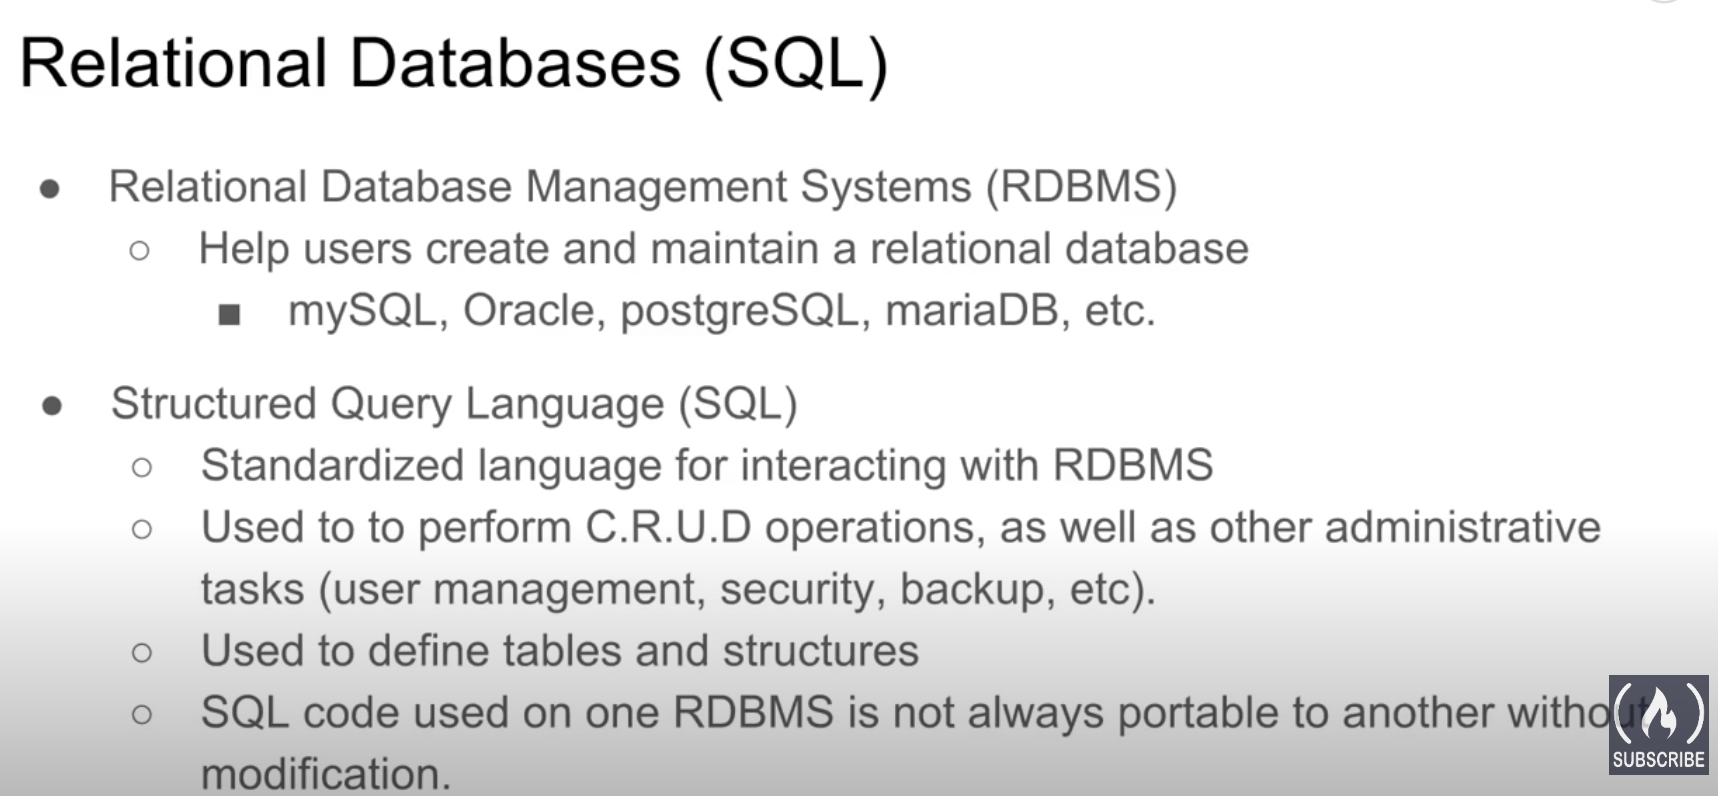

In [4]:
# from IPython.display import Image
# Image(filename='./img/dbms.png')

In [1]:
![Alt text](/Users/yueqi/Desktop/Notes/img/Screenshot 2023-03-21 at 11.28.55 AM.jpg)

zsh:1: bad pattern: [Alt


In [ ]:
Mainly Constraints on the relational database are of 4 types: 

Domain constraints
Key constraintss
Entity Integrity constraints
Referential integrity constraints